In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

file_pattern = os.path.join("results", 'new_time_results*.csv')
file_list = glob.glob(file_pattern)

dataframes = [pd.read_csv(file) for file in file_list]
combined_df = pd.concat(dataframes, ignore_index=True)
# remove the 'method' column
combined_df = combined_df.drop(columns=['method'])
# order combined ef by n_samples then n_features
combined_df = combined_df.sort_values(by=['n_samples', 'n_features'])
# average dataframe by n_samples and n_features
combined_df = combined_df.groupby(['n_samples', 'n_features']).mean().reset_index()
# convert units from seconds to hours in all columns that have the word 'time'
time_cols = [col for col in combined_df.columns if 'time' in col]
combined_df[time_cols] = combined_df[time_cols] / 3600
combined_df


,n_samples,n_features,check_data_time,fit_rf_time,fit_forest_time,init_transformer_time,get_transformed_data_time,fit_prediction_model_time,average_tree_time,init_ppm_time,get_leafs_in_test_samples_time,partial_predictions_time,mean_partial_pred_time_per_estimator,mean_partial_pred_k_time_per_estimator,leaf_average_time,get_lfi_time
0,1000,10,3.274944e-08,0.000112,0.003239,4.284769e-07,0.000008,0.000004,0.000013,0.000006,1.125866e-09,0.001869,0.000016,4.111603e-07,0.000068,0.001938
1,1000,50,8.165836e-08,0.000351,0.003318,4.073577e-07,0.000019,0.000008,0.000027,0.000005,1.192093e-09,0.011720,0.000111,9.948801e-07,0.000086,0.011806
2,1000,100,1.583497e-07,0.000663,0.003614,3.601578e-07,0.000025,0.000006,0.000032,0.000007,1.258320e-09,0.027868,0.000267,1.448899e-06,0.000115,0.027983
3,1000,200,6.971425e-07,0.001287,0.004140,3.399733e-07,0.000043,0.000005,0.000049,0.000006,1.125866e-09,0.087310,0.000846,2.323120e-06,0.000184,0.087494
4,1000,500,2.399981e-06,0.004005,0.005772,3.950000e-07,0.000121,0.000006,0.000128,0.000005,1.158979e-09,0.809124,0.008013,5.209711e-06,0.000480,0.809604
5,10000,10,2.017617e-07,0.001196,0.003794,4.754202e-07,0.000031,0.000015,0.000048,0.000007,1.357661e-09,0.008754,0.000075,4.300915e-06,0.000231,0.008986
6,10000,50,2.492534e-06,0.005879,0.004132,5.299386e-07,0.000065,0.000054,0.000121,0.000007,3.808075e-09,0.079885,0.000731,8.065332e-06,0.000584,0.080469
7,10000,100,1.949999e-06,0.010032,0.004272,5.242099e-07,0.000079,0.000062,0.000142,0.000007,1.688798e-09,0.095768,0.000882,8.562051e-06,0.000931,0.096699
8,10000,200,2.960066e-06,0.020960,0.004617,5.289826e-07,0.000105,0.000057,0.000164,0.000006,7.483694e-09,0.199680,0.001765,9.232622e-06,0.001977,0.201657
9,10000,500,6.414718e-06,0.043432,0.005975,4.795071e-07,0.000204,0.000050,0.000256,0.000005,3.311369e-09,1.065729,0.009956,1.185042e-05,0.005109,1.070838


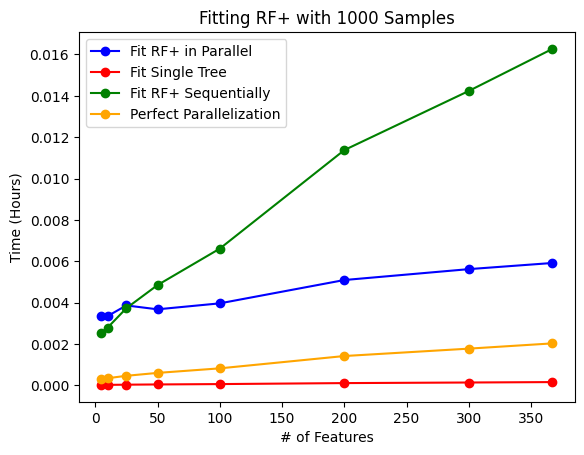

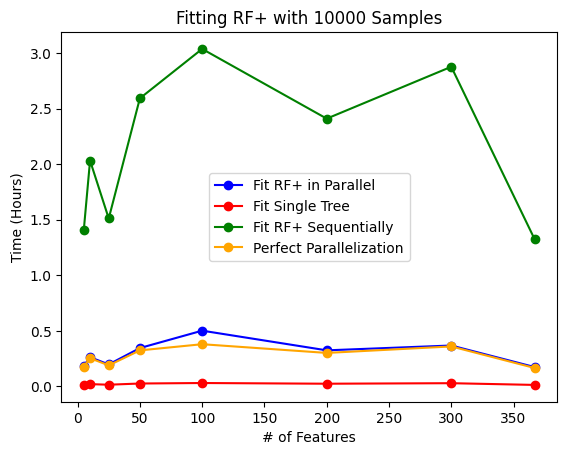

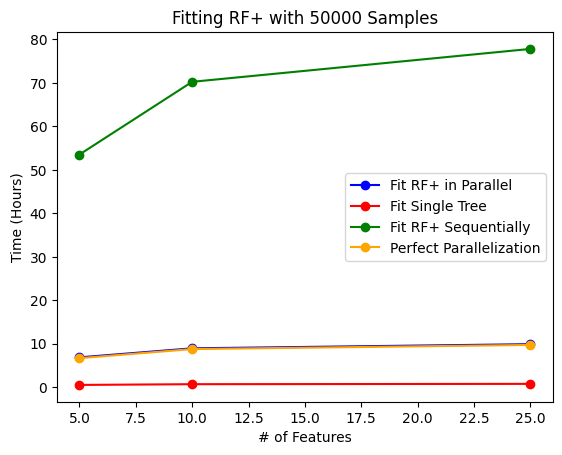

In [2]:
# for each n_samples, plot n_features vs total_time
# plot should be scatterplot connected by lines
for n_samples in combined_df['n_samples'].unique():
    df = combined_df[combined_df['n_samples'] == n_samples]
    plt.plot(df['n_features'], df['fit_forest_time'], linestyle = '-', marker = "o", color = 'blue')
    plt.plot(df['n_features'], df['average_tree_time'], linestyle = '-', color = 'red',marker = "o")
    plt.plot(df['n_features'], df['average_tree_time']*100, linestyle = '-', color = 'green',marker = "o")
    plt.plot(df['n_features'], df['average_tree_time']*12.5, linestyle = '-', color = 'orange',marker = "o")
    plt.xlabel('# of Features')
    plt.ylabel('Time (Hours)')
    plt.title(f'Fitting RF+ with {n_samples} Samples')
    # create a legend that breaks it down by color
    plt.legend(['Fit RF+ in Parallel', 'Fit Single Tree', 'Fit RF+ Sequentially', 'Perfect Parallelization'])
    plt.show()


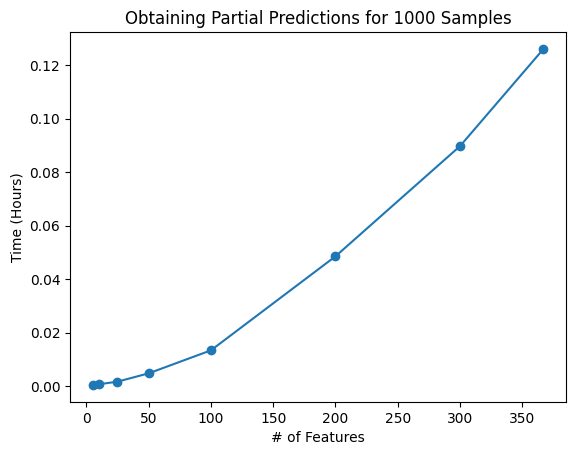

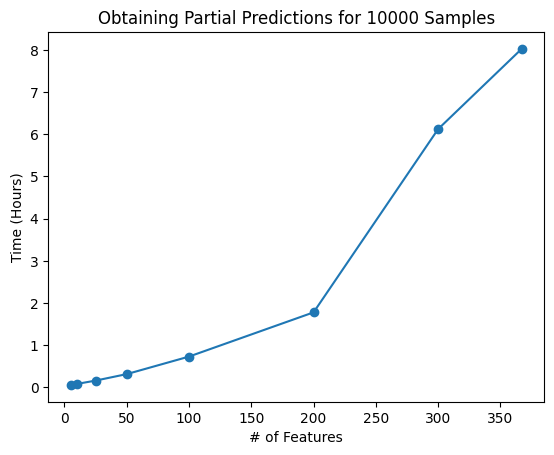

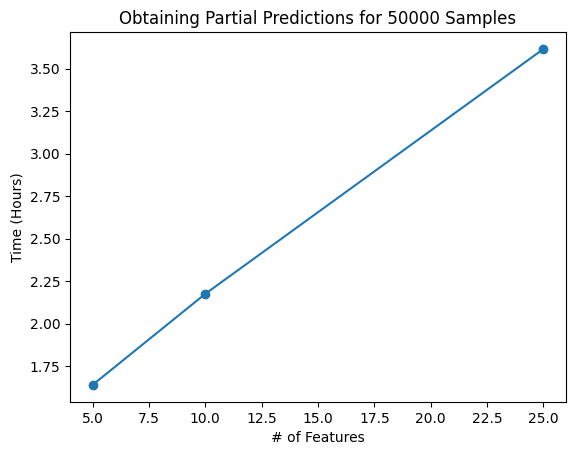

In [15]:
# for each n_samples, plot n_features vs total_time
# plot should be scatterplot connected by lines
for n_samples in combined_df['n_samples'].unique():
    df = combined_df[combined_df['n_samples'] == n_samples]
    plt.plot(df['n_features'], df['partial_predictions_time'], linestyle = '-', marker = "o")
    plt.xlabel('# of Features')
    plt.ylabel('Time (Hours)')
    plt.title(f'Obtaining Partial Predictions for {n_samples} Samples')
    plt.show()
